## Грузим задание

In [1]:
! wget -nc https://github.com/artonson/hse-stat-course-2018/raw/master/homework-handouts/homework-3.pdf

Файл «homework-3.pdf» уже существует — не загружается.



### Грузим данные

In [2]:
! wget -nc -P data/ https://raw.githubusercontent.com/artonson/hse-stat-course-2018/master/homework-handouts/passengercarmileage.txt

Файл «data/passengercarmileage.txt» уже существует — не загружается.



# Задание 1.

Заметим, что $E[X] = \lambda, D[X] = \lambda$. Введем оценку $\hat\lambda = \overline X$ -- ассимптотичски нормальная оценка.
$$
W = \dfrac{\hat\lambda - \lambda_0}{\hat{se}}
$$
$$
\hat{se} = \sqrt{\frac{\hat{\lambda}}{n}}
$$
$H_0$ отклоняем, если $|W| > z_{\alpha/2}$

In [6]:
import numpy as np
import scipy.stats
from tqdm import tqdm_notebook as tqdm

In [9]:
lambda_0 = 1
n = 20
alpha = 0.05
print(scipy.stats.norm.interval(alpha), scipy.stats.norm.ppf(alpha / 2))

(-0.06270677794321385, 0.06270677794321385) -1.9599639845400545


In [26]:
def h0_accept():
    X = np.random.poisson(lam=lambda_0, size=n)
    W = (X.mean() - lambda_0) / np.sqrt(X.mean() / n)
    #print(W)
    z_alpha2 = scipy.stats.norm.interval(1 - alpha)[1]
    #print(z_alpha2)
    return not(np.abs(W) > z_alpha2)

In [27]:
n_exp = 10**4
count_accepted = 0
for i in tqdm(range(n_exp)):
    count_accepted += h0_accept()
print('Доля экспериментов с отклоненной H0 = %f' % (1 - count_accepted / n_exp))


Доля экспериментов с отклоненной H0 = 0.056500


##### Ну, конечно, доля получилулась близка к $\alpha$. Мы же отлично знаем мат. статистику, а она говорит, что доля ошибок первого сходится к $\alpha$ 

# Задание 3

In [42]:
import pandas as pd

In [45]:
df = pd.read_csv('data/passengercarmileage.txt', sep='\t')
df[:5]

,makeAndModel,VOL,HP,MPG,SP,WT
0,GM/GeoMetroXF1,89,49,65.4,96,17.5
1,GM/GeoMetro,92,55,56.0,97,20.0
2,GM/GeoMetroLSI,92,55,55.9,97,20.0
3,SuzukiSwift,92,70,49.0,105,20.0
4,DaihatsuCharade,92,53,46.5,96,20.0


In [47]:
y_data = df['MPG']
x_data = df['HP']

In [51]:
from sklearn.linear_model import LinearRegression

In [57]:
regr = LinearRegression().fit(x_data.values.reshape((-1, 1)), y_data.values)
coef = regr.coef_

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [66]:
print(coef)
min_max_ind = np.array([np.argmax(x_data.values), np.argmin(x_data.values)])
x_regr = x_data[min_max_ind]
y_regr = regr.predict(x_regr)

[-0.13902326]


ValueError: Expected 2D array, got 1D array instead:
array=[322  49].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

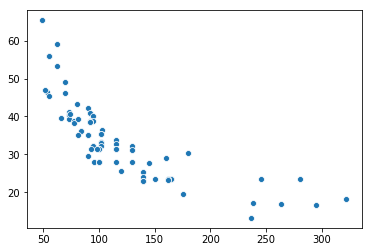

In [50]:
sns.scatterplot(x_data.values, y_data.values)
sns.lineplot(x)